# Skyrmion in a disc

In [27]:
import math

import discretisedfield as df

import mumaxc as mc

%matplotlib inline

## Define the mesh

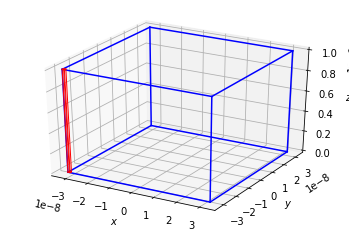

In [28]:
L = 64e-9
d = 1e-9
mesh = mc.Mesh(p1=(-L / 2, -L / 2, 0), p2=(L / 2, L / 2, d), cell=(d, d, d))
mesh

## Define the Hamiltonian

In [29]:
system = mc.System(name="skyrmion")
system.hamiltonian = mc.Exchange(A=15e-12)
system.hamiltonian += mc.Zeeman(H=(0, 0, 1e5))
system.hamiltonian += mc.Demag()
system.hamiltonian += mc.UniaxialAnisotropy(K1=0.8e6, u=(0, 0, 1))
system.hamiltonian += mc.DMI(D=3.5e-3, crystalclass="cnv")
system.hamiltonian

Exchange(A=1.5e-11, name='exchange') + Zeeman(H=(0, 0, 100000.0), name='zeeman') + Demag(name='demag') + UniaxialAnisotropy(K1=800000.0, K2=0, u=(0, 0, 1), name='uniaxialanisotropy') + DMI(D=0.0035, crystalclass='cnv', name='dmi')

## Set the initial magnetization and the sample geometry

In [30]:
Ms = 580e3
Rskyrm = L / 4


def m_skyrmion(pos):
    x, y, z = pos
    r = math.sqrt(x**2 + y**2)
    mz = 2 * math.exp(-((r / Rskyrm) ** 2)) - 1
    mx = (x / r) * (1 - abs(mz))
    my = (y / r) * (1 - abs(mz))
    return mx, my, mz


def msat_disc(pos):
    x, y, z = pos
    return Ms if x**2 + y**2 < (L / 2) ** 2 else 0


system.m = df.Field(mesh, value=m_skyrmion, norm=msat_disc)

## Minimize the free magnetic energy

2019/06/13 13:22: Running mumax3 (skyrmion/drive-0/skyrmion.mx3) ... (3.0 s)


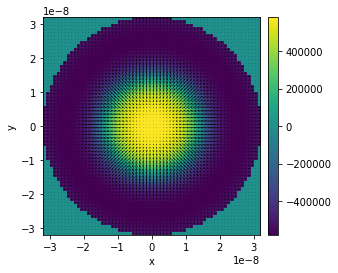

In [31]:
md = mc.MinDriver()
md.drive(system, overwrite=True)

system.m.plot_plane("z")